# <center> Final solution
# <center> News Lenta.ru dataset  
### <center> by Glazunov Artem

Works via Google Colab

Let's connect directories and load useful libs.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd /content/gdrive/'My Drive'/Colab_Notebooks/project_intern

/content/gdrive/My Drive/Colab_Notebooks/project_intern


In [3]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 552kB 18.9MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=a785036e552b4af3c70d00a13522c8333ef7f70fe05a3c72076ddd7e0221242c
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=cad5d44884fcb2a1df6b678eaaea94a42c1a668f7666788e526841a13f3e0a6d
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [4]:

import os
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora

from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# vectorizing and so on
from sklearn.feature_extraction.text import CountVectorizer
import warnings
from tqdm import tqdm_notebook


In [5]:
PATH_TO_DATA = 'texts_after_preproc'

Load the data

In [6]:
data = pd.read_csv(os.path.join(PATH_TO_DATA,'texts_prep.csv'),index_col=0)
data

,texts
0,бой сопоцкин друскеник заканчиваться отступлен...
1,министерство народный просвещение вид происход...
2,штабскапитан п н нестеров день увидеть район ж...
3,фотографкорреспондент daily mirror рассказыват...
4,лицо приезжать варшава люблин передавать туда ...
...,...
800965,певец сергей шнуров раскритиковывать свой колл...
800966,министерство юстиция россия предлагать изменят...
800967,испытание сша ранее запрещать договор ликвидац...
800968,близкий день европейский часть россия погода а...


In [7]:
data_list = data.texts.values.tolist()
data_list[:3]

['бой сопоцкин друскеник заканчиваться отступление германец неприятель приближаться север осовец начинать артиллерийский борьба крепость артиллерийский бой принимать участие тяжелый калибр ранний утро 14 сентябрь огонь достигать значительный напряжение попытка германский пехота пробиваться близко крепость отражать галиция занимать дембицу большой колонна отступать шоссе перемышль санока обстреливаться высота наш батарея бежать бросать парк обоз автомобиль вылазка гарнизон перемышль оставаться безуспешный продолжаться отступление австриец обнаруживаться полный перемешивание часть захватываться новый партия пленный орудие прочий материальный часть перевал ужок разбивать неприятельский отряд взять артиллерия пленный продолжать преследовать вступать предел венгрия русский инвалид 16 сентябрь 1914 год',
 'министерство народный просвещение вид происходить чрезвычайный событие признавать соответственный день годовщина день рождение мю лермонтов 2го октябрь 1914 год ограничиваться совершение у

Let's use our parameters from the previous stage

In [8]:
vectorizer = CountVectorizer(ngram_range=(1, 2),min_df=640,max_df =0.25)
matrix = vectorizer.fit_transform(data_list)

In [9]:
vectorizer.vocabulary_

{'бой': 2557,
 'заканчиваться': 6148,
 'приближаться': 13954,
 'север': 16415,
 'начинать': 10194,
 'артиллерийский': 2175,
 'борьба': 2633,
 'крепость': 8335,
 'принимать': 14117,
 'участие': 19518,
 'тяжелый': 19036,
 'калибр': 7338,
 'ранний': 15158,
 'утро': 19494,
 '14': 171,
 'сентябрь': 16514,
 'огонь': 11110,
 'достигать': 5720,
 'значительный': 6606,
 'напряжение': 9973,
 'попытка': 13272,
 'германский': 4189,
 'пехота': 12426,
 'пробиваться': 14252,
 'близко': 2512,
 'отражать': 11898,
 'занимать': 6262,
 'большой': 2594,
 'колонна': 7651,
 'отступать': 11939,
 'шоссе': 20503,
 'высота': 4001,
 'наш': 10214,
 'батарея': 2349,
 'бежать': 2367,
 'бросать': 2691,
 'парк': 12114,
 'автомобиль': 1748,
 'гарнизон': 4128,
 'оставаться': 11644,
 'продолжаться': 14363,
 'австриец': 1728,
 'обнаруживаться': 10891,
 'полный': 13058,
 'часть': 20166,
 'новый': 10617,
 'партия': 12135,
 'пленный': 12542,
 'орудие': 11554,
 'прочий': 14705,
 'материальный': 8973,
 'разбивать': 14924,
 'отр

Helper functions

In [10]:
def vect2gensim(vectorizer, dtmatrix):
     # transform sparse matrix into gensim corpus and dictionary
    corpus_vect_gensim = gensim.matutils.Sparse2Corpus(dtmatrix, documents_columns=False)
    dictionary = gensim.corpora.dictionary.Dictionary.from_corpus(corpus_vect_gensim,
        id2word=dict((id, word) for word, id in vectorizer.vocabulary_.items()))

    return (corpus_vect_gensim, dictionary)

In [11]:
def corpus2words_lists(gensim_corpus,gensim_dict):

  #Converts corpus to texts in the form of words lists for gensim Coherence model 

  dictionary = dict(gensim_dict)
  corpus_list = list(gensim_corpus)

  texts_new = []
  for text_meta in corpus_list:
    text_new=[]
    for pair in text_meta:
      for counter in range(1,pair[1]+1):
        text_new.append(dictionary[pair[0]])
    texts_new.append(text_new)

  return texts_new

Some preparations

In [12]:
(gensim_corpus, gensim_dict) = vect2gensim(vectorizer, matrix)

In [13]:
data_words = corpus2words_lists(gensim_corpus,gensim_dict)

Let's slightly increase sparsity and set num_topics to 20, because more data brings more topics. I will also use 20 passes through the data, so, the model can converge better.

In [14]:
%%time
warnings.filterwarnings("ignore")
best_lda_model_final = gensim.models.LdaMulticore(corpus=gensim_corpus,
                                           id2word=gensim_dict,
                                           num_topics=20, 
                                           random_state=100,                                           
                                           workers = 3,
                                           passes=20,
                                           eta = 0.005,
                                           alpha = 0.007
                                        )
PATH_TO_SAVE = 'results2'
best_lda_model_final.save(os.path.join(PATH_TO_SAVE,'model2'))

CPU times: user 4h 9min, sys: 3min 23s, total: 4h 12min 24s
Wall time: 4h 9min 20s


In [15]:
pprint(best_lda_model_final.print_topics())

[(0,
  '0.013*"москва" + 0.013*"город" + 0.011*"область" + 0.011*"тысяча" + '
  '0.010*"дом" + 0.009*"квартира" + 0.009*"метр" + 0.008*"район" + '
  '0.007*"площадь" + 0.007*"строительство"'),
 (1,
  '0.022*"фильм" + 0.012*"актер" + 0.010*"роль" + 0.009*"картина" + '
  '0.009*"режиссер" + 0.008*"премия" + 0.008*"актриса" + 0.007*"сериал" + '
  '0.007*"выходить" + 0.007*"главный"'),
 (2,
  '0.019*"президент" + 0.014*"глава" + 0.012*"владимир" + 0.011*"путин" + '
  '0.009*"сказать" + 0.008*"российский" + 0.007*"владимир путин" + '
  '0.006*"президент россия" + 0.006*"москва" + 0.006*"вопрос"'),
 (3,
  '0.015*"пользователь" + 0.013*"сеть" + 0.011*"компания" + 0.009*"сайт" + '
  '0.007*"новый" + 0.007*"опубликовывать" + 0.006*"видео" + 0.006*"появляться" '
  '+ 0.006*"информация" + 0.006*"сервис"'),
 (4,
  '0.011*"полиция" + 0.011*"происходить" + 0.010*"сотрудник" + '
  '0.008*"автомобиль" + 0.008*"задерживать" + 0.007*"мужчина" + '
  '0.007*"полицейский" + 0.006*"данные" + 0.006*"орган" +

The topics seem to be interpretive. Let's check them.

In [16]:
data_list[800]

'4 октябрь мэр москва юрий лужков запрещать департамент комитет управление правительство москва закупать импортный изделие счет городской бюджет случай москва производиться аналогичный товар кроме поручать департамент наука промышленный политика правительство москва срок 30 декабрь 1999 год разрабатывать каталог изделие выпускать предприятие москва нужда городской хозяйство цель повышение эффективность использование средство городской бюджет защита московский товаропроизводитель свой очередь департамент комитет управление правительство москва осуществление закупка городской нужда вменять обязанность согласовывать департамент наука промышленный политика номенклатура закупать импорт продукция список товар который правительство москва закупать исключительно дома сделать лишь несколько исключение например продолжаться приобретение автобус икарус городской транспортный хозяйство'

In [17]:
best_lda_model_final.get_document_topics(gensim_corpus[800])

[(0, 0.36076403), (9, 0.19130993), (10, 0.44678333)]

In [18]:
data_list[80000]

'госдума пленарный заседание вторник принимать третий окончательный чтение закон ипотечный ценный бумага сообщать прессслужба дума отмечать время рассмотрение документ представитель равительство андрей логинов отрицательный заключение правительство закон оставаться сила дума это остановилоиван грачев'

In [19]:
best_lda_model_final.get_document_topics(gensim_corpus[80000])

[(9, 0.13689084), (10, 0.8161459), (18, 0.04301506)]

In [20]:
data_list[100000]

'президент россия назначать директор федеральный служба технический экспортный контроль сергей григоров председатель межведомственный комиссия защита государственный тайна одновременно президент свой указ освобождать исполнение обязанность глава комиссия борис алешин который правительство касьянов занимать пост вицепремьера россия настоящий время являться руководитель федеральный агентство промышленность текст указ размещать 31 август официальный сайт президент правительство россия поручать представлять предложение состав межведомственный комиссия защита гостайн должность также предложение совершенствование деятельность комиссия сообщать информационный агентство праймтасс григоров назначать пост директор федеральный служба технический экспортный контроль указ президент россия конец июль 2004 год ранее григоров занимать должность председатель государственный технический комиссия президент россия федеральный служба технический экспортный контроль находиться ведение министерство оборона р

In [21]:
best_lda_model_final.get_document_topics(gensim_corpus[100000])

[(2, 0.4131401), (6, 0.13205066), (10, 0.45383495)]

In [22]:
data_list[300000]

'правительство рф предложение парламент кемеровский область принимать решение перевод регион часовой пояс сообщать интерфакс 28 март 2010 год страна осуществляться переход летний время кемеровский область переводить часы становиться разница время кемерово москва сокращаться четыре utc7 красноярский время час utc6 омский время кемеровский область оказываться часовой пояс новосибирский бишкек барнаул астана алмаата 90х год многий российский регион подвигаться часовой пояс сторона москва частность весь западный сибирь переходить красноярский время омский кемеровский область оставаться единственный регион осуществлять переход'

In [23]:
best_lda_model_final.get_document_topics(gensim_corpus[300000])

[(0, 0.4938228), (7, 0.13095635), (10, 0.31543112), (16, 0.058279045)]

In [24]:
data_list[800012]

'форвард арсенал николя пепе становиться автор хороший гол 16м тур английский премьерлига апл это сообщать корреспондент лентыр нападать забивать мяч обводить удар дальний верхний угол матч против вест хэм 31 француз приносить арсенал победа пятерка хороший также входить гол матео ковачич челси наби кейт ливерпуль харри кейн сон хын мина оба тоттенхэм пепе лето присоединяться канонир 79 миллион евро это рекордный трансфер история лондонский клуб'

In [25]:
best_lda_model_final.get_document_topics(gensim_corpus[800012])

[(3, 0.021881169),
 (7, 0.108999394),
 (8, 0.029768685),
 (13, 0.75480115),
 (17, 0.0210319),
 (18, 0.061832126)]

In [26]:
def plot_difference(mdiff, title="", annotation=None):
    """Helper function to plot difference between models.

    Uses matplotlib as the backend."""
    
    fig, ax = plt.subplots(figsize=(18, 14))
    data = ax.imshow(mdiff, cmap='RdBu_r', origin='lower')
    plt.title(title)
    plt.colorbar(data)

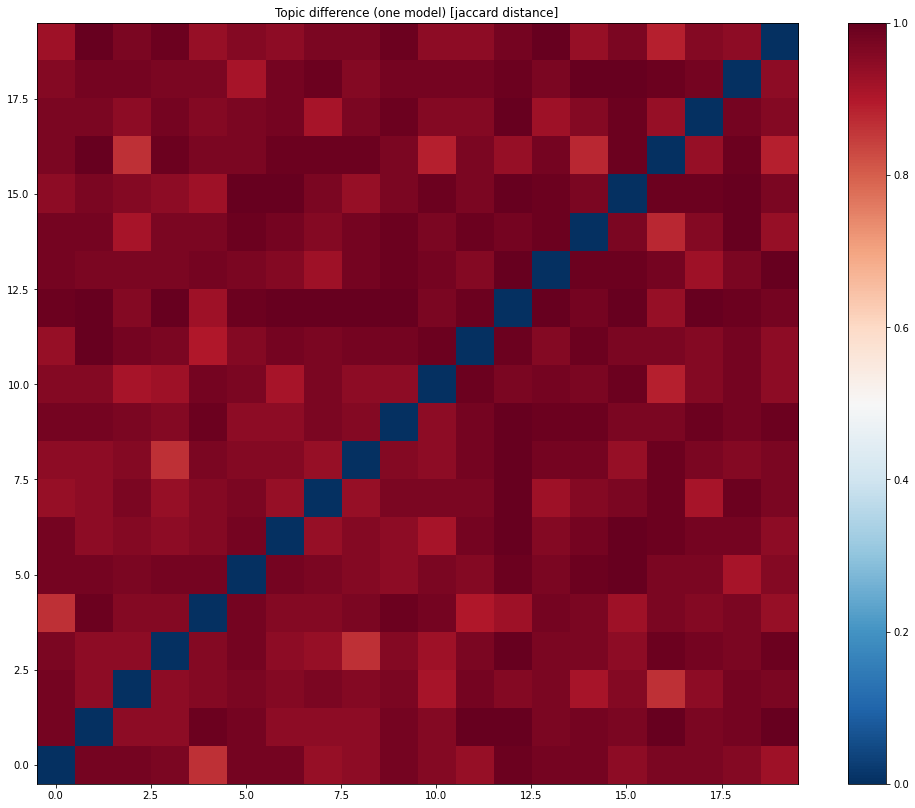

In [27]:
mdiff, annotation = best_lda_model_final.diff(best_lda_model_final, distance='jaccard', num_words=50)
plot_difference(mdiff, title="Topic difference (one model) [jaccard distance]", annotation=annotation)

In [28]:
%%time
# Compute Coherence Score
coherence_model_lda_final = CoherenceModel(model=best_lda_model_final, texts=data_words, dictionary=gensim_dict, coherence='c_v')
coherence_lda_final = coherence_model_lda_final.get_coherence()


CPU times: user 1min 17s, sys: 1.88 s, total: 1min 19s
Wall time: 24min 29s


In [29]:
print('Coherence Score: ', coherence_lda_final)

Coherence Score:  0.6512550536484503


In [30]:
%%time
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(best_lda_model_final, gensim_corpus, gensim_dict)

CPU times: user 13min 30s, sys: 16.2 s, total: 13min 46s
Wall time: 13min 44s


In [31]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
2      0.037114  0.177519       1        1  7.842714
12     0.152825  0.009627       2        1  7.177408
4      0.266571 -0.138633       3        1  6.612690
10    -0.056250  0.044013       4        1  6.306142
19     0.141853 -0.012450       5        1  5.735606
18    -0.197177 -0.194586       6        1  5.647075
16     0.037872  0.124224       7        1  5.538231
15     0.107689  0.088132       8        1  5.476627
14     0.021153  0.203199       9        1  5.131500
13    -0.040206  0.040968      10        1  5.033850
9     -0.161904 -0.023116      11        1  4.846991
0      0.087200 -0.213510      12        1  4.689013
5     -0.203291 -0.124259      13        1  4.626640
3     -0.077821  0.050192      14        1  4.600524
7     -0.088538  0.050865      15        1  4.357899
8     -0.075943 -0.025106      16        1  4.136620
6     -0.061944 -0.056537      17        1  3.419246
1     -0.051024  0.165230      18        1  3.028119
17     0.023050 -0.017055      19        1  2.925968
11     0.138771 -0.148717      20        1  2.867131, topic_info=              Term           Freq          Total Category  logprob  loglift
2489       процент  329336.000000  329336.000000  Default  30.0000  30.0000
759       компания  336295.000000  336295.000000  Default  29.0000  29.0000
1575           сша  298148.000000  298148.000000  Default  28.0000  28.0000
1985         рубль  280356.000000  280356.000000  Default  27.0000  27.0000
513        миллион  247617.000000  247617.000000  Default  26.0000  26.0000
...            ...            ...            ...      ...      ...      ...
1105      километр   11692.288086   48686.156250  Topic20  -5.5740   2.1254
710     российский   16330.858398  363098.531250  Topic20  -5.2398   0.4502
2892          море   10449.034180   27740.437500  Topic20  -5.6864   2.5755
371         данные   10928.793945  208126.890625  Topic20  -5.6415   0.6051
1315  это сообщать   10709.029297  209152.140625  Topic20  -5.6618   0.5799

[1422 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
2557      2  0.000934             100
2557      3  0.019041             100
2557      4  0.019842             100
2557      5  0.080012             100
2557      6  0.399306             100
...     ...       ...             ...
807      19  0.026269        являться
807      20  0.001916        являться
6069     16  0.038440         ядерный
6069     17  0.961534         ядерный
9028     17  0.999980  ядерный оружие

[5047 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 13, 5, 11, 20, 19, 17, 16, 15, 14, 10, 1, 6, 4, 8, 9, 7, 2, 18, 12])

## So, during this stage we got the final model. In the next file, we will use it for the dataset to create the topic description in the dataframe.